# PRÁCTICA 1

## Ejercicio 0
En este ejercicio planteo otra forma de escribir el código del método de bisección para la resolución de ecuaciones no lineales.
No difiere mucho del código original. El objetivo de hacer este ejercicio es para familiarizarme con el lenguaje y con el métido en sí.

In [ ]:
# Método de bisección
num_it = 0

for i in range(nmax):
    c = (a+b)/2
    num_it=num_it+1
    if (abs(f(c)) < prec):
        print("Se ha alcanzado la precisión requerida. Posible sol: ", c) 
        break
    if (f(a)*f(c) < 0):
         b = c
    else: 
        a = c
    if b-a < tol:
        print("Intervalo con mucha precisión. Aproximación solicitada: ", c) 
        break

print("Solución exacta: ", sol_exact)
print("Numero de iteraciones requerido: ", num_it)

## Ejercicio 0.5

Modifique cualquiera de estos códigos con el objeto de implementar el conocido algoritmo de regula-falsi, en el que se obtiene el punto $c$ no como el punto medio entre $a$ y $b$, sino como el punto de corte con el eje $Ox$ de la recta que une los puntos $(a,f(a))$ y $(b,f(b))$, tal y como se muestra también en el siguiente método de la secante.

In [ ]:
# Método regula-falsi
num_it = 0

for i in range(nmax):
    c = b - ((a-b)*f(b))/(f(a)-f(b))
    num_it=num_it+1
    if (abs(f(c)) < prec):
        print("Se ha alcanzado la precisión requerida. Posible sol: ", c) 
        break
    if (f(a)*f(c) < 0):
         b = c
    else: 
        a = c
    if b-a < tol:
        print("Intervalo con mucha precisión. Aproximación solicitada: ", c) 
        break

print("Solución exacta: ", sol_exact)
print("Numero de iteraciones requerido: ", num_it)

#### Salida:
    Intervalo con mucha precisión. Aproximación solicitada:  1.0986122886618854

    Solución exacta:  log(3)

    Numero de iteraciones requerido:  1

---------------------------------------------------------------------------------------------------------------------------

# RELACIÓN DE EJERCICIOS

---------------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import sympy as sp

In [2]:
from decimal import Decimal, getcontext
mporig = getcontext().prec

In [3]:
from matplotlib import *

Función destinada al cálculo de raíces de una función dada, en una variable dada.

In [4]:
def sol_exact(f,x,todas=True):
    # Función que calcula las soluciones de una ecuación
    try:
        soluciones = sp.solve(f(x),x)
        num_sols   = len(soluciones)
        if todas==True:
            print("Se han encontrado : {} soluciones".format(num_sols))
            for i in range(num_sols):
                print("Solución {}: {}".format(i+1,soluciones[i].evalf()))
        return soluciones,num_sols
    except NotImplementedError:
        print("No existen soluciones para esta ecuación : {}".format(f(x))) 

### Método de Bisección

In [27]:
# Método de bisección
# Vamos a encapsular el método de bisección en una función

def biseccion ( a, b, f, muestra, cifras=16, nmax=100, prec=10**(-5)):

    niter = 0
    terms = []

    if (cifras <= 0):
        cifras = calc_cifras(prec)
    getcontext().prec = int(cifras)
    tol = 10**(-cifras+1)

    for i in range(nmax):
        niter = niter + 1
        c = (a+b)/2
        terms.append(float(c))
        if (abs(f(c)) < prec):
            p = "Precision"
            break
        if (f(a)*f(c) <= 0):
            b = c
        else: 
            a = c
        if b-a < tol:
            p = "Tolerance"
            break
    
    if (muestra):
        print("MÉTODO DE BISECCIÓN APLICADO A LA ECUACIÓN: ", f(x))
        
        if (p == "Precision"):
            print("Se ha alcanzado la precisión requerida. Posible solución exacta: ", float(c))
            print('Aproximación con {} decimales: {}'.format(cifras-1, round(c, cifras-1))) 
        elif niter < nmax:
            print('Aproximación con {} decimales: {}'.format(cifras-1, round(c, cifras-1))) 
        else:
            print("Intervalo con maxima tolerancia. Aproximación solicitada: ", float(c))

        print("Numero de iteraciones requerido: ", niter)

    return terms


### Método de Newton-Raphson

In [26]:
# Método de Newton-Raphson
# Vamos a encapsular el método de Newton-Raphson en una función
def newton_raphson( b, f, deriv, muestra, cifras=16, nmax=100, prec=10**(-3)):

    getcontext().prec = int(cifras)
    tol = 10**(-cifras+1)
    x0 = b; niter = 0
    terms = []
    terms.append(float(x0))

    for k in range(nmax):
        niter = niter + 1
        x1 = x0 - f(x0)/deriv(x0)  # método de Newton-Raphson
        terms.append(x1)
        if abs(x1-x0) < tol:
            p = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            p = 'precision'
            break
        else:
            x0 = x1

    if (muestra):
        print("MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN: ", f(x))
        if (p == "Precision"):
            print("Se ha alcanzado la precisión requerida. Posible solución: ", float(x1))
            print('Aproximación con {} decimales: {}'.format(cifras-1, round(float(x1), cifras-1))) 
        else:
            print("Intervalo con maxima tolerancia. Aproximación solicitada: ", float(x1))
            print('Aproximación con {} decimales: {}'.format(cifras-1, round(float(x1), cifras-1))) 

        print("Numero de iteraciones requerido: ", niter)

    getcontext().prec = mporig # Se restaura la precisión por defecto

    return terms

In [9]:
# Función que determina si una función cambia de signo en un intervalo dado:
def sgn(f,a,b):
    if f(a)*f(b) < 0:
        print("Sí hay cambio de signo: Hay raíz")
    else:
        print("No hay cambio de signo: No hay raíz")

In [10]:
def calc_cifras(precision):
    
    return int(np.ceil(abs(np.log10(precision))))

# EJERCICIO 1

Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

Probemos en primer lugar que dicha ecuación posee una única ecuación. Sea $f: [1,2] \rightarrow [1,2]$ la aplicación dada por $f(x) = x^{3} + 4x^{2} - 10$, la cual claramente es continua en todo el intervalo y además derivable por ser una función polinómica (en particular es derivable en todo $\mathbb{R}$). Es por ello que podemos aplicar el **teorema de Bolzano** para comprobar que la ecuación tiene **al menos** una raíz real: si $f(1) \cdot f(2) < 0$ entonces la función posee al menos una raíz real en el intervalo $[1,2]$. Veámoslo haciendo uso de una función de python que determina si hay cambio de signo en el intervalo y, por consiguiente, si hay raíz dentro del mismo:





In [8]:
a = 1; b = 2

In [14]:
def f(x):

    return x**3 + 4*x**2 - 10

In [10]:
sgn(f,a,b)

Sí hay cambio de signo: Hay raíz


La función nos informa por tanto de que $f(1)\cdot f(2) < 0$ así que el Teorema de Bolzano nos dice que la función posee al menos una raíz en el intervalo $[1,2]$.

Probemos ahora que dicha solución, necesariamente ha de ser única. Calculemos la derivada de $f$:

> $f^{'}(x) = 3x^{2} + 8x^{2}$

Claramente, $f'(x) > 0 \forall x \in [1,2]$. Es por ello que la función $f$ es estrictamente creciente en dicho intervalo y, por consiguiente, de cortar al eje $OX$, solo lo hará una única vez. Concluimos por tanto que la raíz que el teorema de Bolzano afirmaba que existía, es única.

A continuación, vamos a aproximar dicha raíz con al menos 3 cifras decimales exactas, aplicando para ello el método de bisección:

In [12]:
sol_exact(f,x)

Se han encontrado : 3 soluciones
Solución 1: -2.68261500670705 - 0.358259359924043*I
Solución 2: -2.68261500670705 + 0.358259359924043*I
Solución 3: 1.36523001341410


([-4/3 + (-1/2 - sqrt(3)*I/2)*(sqrt(105)/9 + 71/27)**(1/3) + 16/(9*(-1/2 - sqrt(3)*I/2)*(sqrt(105)/9 + 71/27)**(1/3)),
  -4/3 + 16/(9*(-1/2 + sqrt(3)*I/2)*(sqrt(105)/9 + 71/27)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(sqrt(105)/9 + 71/27)**(1/3),
  -4/3 + 16/(9*(sqrt(105)/9 + 71/27)**(1/3)) + (sqrt(105)/9 + 71/27)**(1/3)],
 3)

In [13]:
# Calculemos la aproximación de la solución requerida
cifras = 4
biseccion(a,b,f,cifras)
print("Solución exacta: ", float(sol_exact(f,x,False)[0][2]))

MÉTODO DE BISECCIÓN APLICADO A LA ECUACIÓN:  x^3 + 4*x^2 - 10
Aproximación con 3 decimales: 1.364
Numero de iteraciones requerido:  10
Solución exacta:  1.3652300134140969


A continuación vamos a estimar el número de iteraciones necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$).

El método de bisección nos permite calcular previamente el número de iteraciones necesarias para obtener la solución con un error inferior a uno dado. Efectivamente, si partimos por ejemplo del único intervalo de amplitud unidad en el que se encuentra la solución $s$, el $[1,2]$ y deseamos una solución con error menor que $10^{-5}$, entonces, teniendo en cuenta que según el Teorema que expone las propiedades del método de bisección: "La sucesión de errores $\{e_{n}\}_{n\geq 0}$ cumple $|e_{n}| < \frac{1}{2^{n+1}} (b-a)$", podemos imponer

<center>

$|e_{n}| < \frac{2-1}{2^{n+1}} \leq 10^{-5}$

</center>

de donde

<center>

$2^{n+1} \geq \frac{1}{10^{-5}} \Rightarrow n \geq log_{2}\frac{1}{10^{-5}} - 1 = \frac{ln \frac{1}{10^{-5}}}{ln 2} - 1$

</center>

Así, obtenemos que 

<center>

$n \geq \frac{ln \frac{1}{10^{-5}}}{ln 2} - 1 \Longleftrightarrow n \geq 15.60964047 ... \Rightarrow n = 16$

</center>

Para obtener un error inferior a $10^{-5}$ con el método de bisección son necesarias $16$ iteraciones.

Por último vamos a hallar la aproximación de la solución con el método de Newton-Raphson hasta conseguir un error inferior 

In [40]:
def deriv(x):
    return 3*x**2+8*x

In [41]:
# Calculemos la aproximación de la solución requerida
v_inic = 1
cifras = 4
newton_raphson(v_inic, f, deriv, cifras)
print("Solución exacta: ", float(sol_exact(f,x,False)[0][2]))

MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN:  x^3 + 4*x^2 - 10
Intervalo con maxima tolerancia. Aproximación solicitada:  1.365236600202116
Aproximación con 3 decimales: 1.365
Numero de iteraciones requerido:  3
Solución exacta:  1.3652300134140969


# EJERCICIO 2

Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos (tol =$10^{-2}$), usando el algoritmo de bisección.


Sea $g: \mathbb{R} \longrightarrow \mathbb{R}$ una aplicación dada por $g(x) = \sqrt[3]{x}$, que es claramente continua y derivable en todo su dominio de definición. Vamos a hacer una aproximación de dicha función aplicada al valor $25$ con dos decimales exactos. Es por ello que previamente a llevar a cabo dicho proceso de aproximación, vamos a ver cuál es el valor exacto de la raíz que se nos pide:

In [243]:
# Definición de la función raíz cúbica de x
def g(x):
    return x**(1/3)

cifras = 3 # tres cifras de precisión
getcontext().prec = int(cifras)

n = float(25)
g(n)
# comprobamos la solución exacta
print("Valor exacto: ", round(g(n), cifras-1))

Valor exacto:  2.92


Procedamos ahora a aplicar el método de bisección para aproximar dicha raíz a dos decimales exactos. Para ello, en primer lugar, observamos que podemos ver el enunciado del ejercicio desde otra perspectiva:

Sea $x$ el valor que buscamos

<center>

$x = \sqrt[3]{25} \Longleftrightarrow x^{3} - 25 = 0$

</center>

Ahora sea $h: \mathbb{R} \longrightarrow \mathbb{R}$ la aplicación dada por $h(x) = x^{3} - 25$, continua y derivable también en su dominio. El ejercicio se reduce a calcular una de sus raíces reales. Apliquemos entonces el método de bisección a esta función en el intervalo $[2,3]$:


In [244]:
def h(x):
    
    return x**3 - 25

v1 = 2; v2 = 3

In [245]:
biseccion(v1,v2,h,cifras)

MÉTODO DE BISECCIÓN APLICADO A LA ECUACIÓN:  x**3 - 25
Aproximación con 3 decimales: 2.925
Numero de iteraciones requerido:  10


# EJERCICIO 3

Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.

i) $x^3-x-1 = 0$  en $[1,2]$.

ii) $3x=2+x^2-e^x$.

iii) $x^2+10\, cos x+x=0$.


Definamos en primer lugar todas las funciones dadas junto con su funcion derivada. Cada una de ellas es continua y derivable en $\mathbb{R}$:

In [357]:
def f_1(x):

    return x**3 - x - 1

def df_1(x):

    return 3*x**2 - 1

def f_2(x):

    return 3*x-2-x**2+sp.exp(x)

def df_2(x):

    return 3 -2*x + sp.exp(x)

def f_3(x):

    return x**2+10*sp.cos(x) + x

def df_3(x):

    return 2*x-10*sp.sin(x) + 1


#### Función 1:

Hallemos en primer lugar las zaíces de la función 1:

In [327]:
v1 = sol_exact(f_1,x,todas=True)

Se han encontrado : 3 soluciones
Solución 1: -0.662358978622373 - 0.562279512062301*I
Solución 2: -0.662358978622373 + 0.562279512062301*I
Solución 3: 1.32471795724475


Nos centramos en la zaíz real que posee: **1.32471795724475**. Apliquemos entonces el Método de Newton-Raphson a dicha función para aproximar la solución que acabamos de ver en su forma exacta, con 6 cifras significativas (*tol*=$10^{-5}$) y partiendo de la semilla $x_{0} = 1.25$ por ejemplo:

In [328]:
# Calculemos la aproximación de la solución requerida
v_inic = 1.25
cifras = 6
newton_raphson(v_inic, f_1, df_1, cifras)
print("Solución exacta: ", float(v1[0][2]))

MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN:  x^3 - x - 1
Intervalo con maxima tolerancia. Aproximación solicitada:  1.3247489592266466
Aproximación con 5 decimales: 1.32475
Numero de iteraciones requerido:  2
Solución exacta:  1.324717957244746


#### Función 2

Hallemos las raíces de esta seguna función:

In [360]:
v2 = sol_exact(f_2,x,todas=True)

No existen soluciones para esta ecuación : -x^2 + 3*x + e^x - 2


Observamos que python no tiene una forma relativamente buena para calcular las razíces de esta función, que se evidencia que tiene por la gráfica

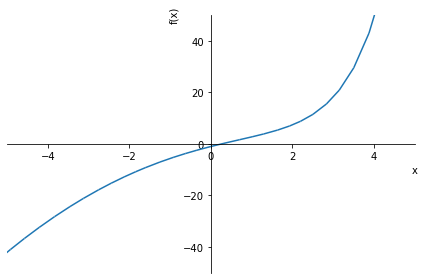

In [348]:
sp.plot(f_2(x),xlim=(-5.0,5.0),ylim=(-50,50))

Para obtener una aproximación de la solución dada la imposibilidad de calcularla de forma exacta, vamos a usar el Método de NR, utilizando una semilla adecuada para ello. Dicha semilla estará dentro del intervalo en el que se encuentre la solución (en el que haya un cambio de signo). Para ver dónde está la solución, ampliemos el gráfico

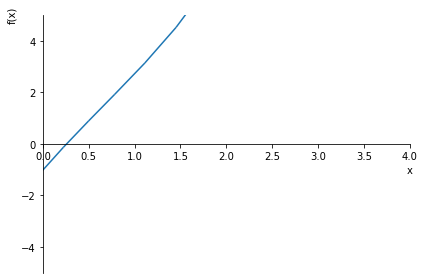

In [349]:
sp.plot(f_2(x),xlim=(0.0,4.0),ylim=(-5.0,5.0))

Claramente observamos que la función posee su raíz en el intervalo de amplitud 1, $[0,1]$. De hecho: 

In [367]:
sgn(f_2,0,1)

Sí hay cambio de signo: Hay raíz


Es por ello que elegiremos la semilla en este intervalo. Sea $x_{0} = 0.5$. Apliquemos el método de NR para hallar la aproximación de la solución con la tolerancia indicada:

In [358]:
# Calculemos la aproximación de la solución requerida
v_inic = 0.5
cifras = 6
newton_raphson(v_inic, f_2, df_2, cifras)

MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN:  -x^2 + 3*x + e^x - 2
Intervalo con maxima tolerancia. Aproximación solicitada:  0.2575289007947096
Aproximación con 5 decimales: 0.25753
Numero de iteraciones requerido:  2


### Función 3

Hallemos en primer lugar las raíces de la función:

In [361]:
v3 = sol_exact(f_3,x,todas=True)

Se han encontrado : 0 soluciones


Veamos que aunque la función nos diga que no hay ninguna solución, sí que las hay. Prueba de ello viene dada por el siguiente gráfico:

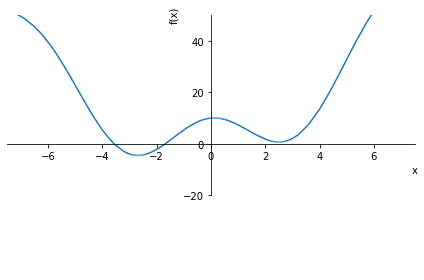

In [364]:
sp.plot(f_3(x),xlim=(-7.5,7.5),ylim=(-50,50))

Gráficamente observamos que corta al eje $OX$ en dos ocasiones. Una en el intervalo $[-4,-3]$ y otra en el intervalo $[-2,-1]$:

In [371]:
# Primer cambio de signo:
sgn(f_3,-4,-3)

Sí hay cambio de signo: Hay raíz


In [373]:
# Segundo cambio de signo:
sgn(f_3,-2,-1)

Sí hay cambio de signo: Hay raíz


Ampliemos la gráfica para tener una mejor visión a la hora de escoger semillas:

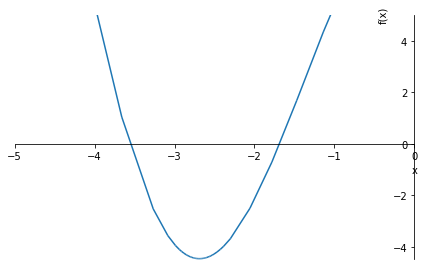

In [370]:
sp.plot(f_3(x),xlim=(-5,0),ylim=(-5.0,5.0))

#### Primera raíz (intervalo $[-4,-3]$)

Sea $x_{0} = -3.2$ la semilla para encontrar mediante NR la raíz del intervalo de amplitud unidad $[-4,-3]$. Apliquemos dicho método:

In [372]:
# Calculemos la aproximación de la solución requerida
v_inic = -3.2
cifras = 6
newton_raphson(v_inic, f_3, df_3, cifras)

MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN:  x^2 + x + 10*cos(x)
Intervalo con maxima tolerancia. Aproximación solicitada:  -3.5623639166228513
Aproximación con 5 decimales: -3.56236
Numero de iteraciones requerido:  3


#### Segunda raíz (intervalo $[-2,-1]$)

Sea $x_{0} = -1.6$ la semilla para encontrar mediante NR la raíz del intervalo de amplitud unidad $[-2,-1]$. Apliquemos dicho método:

In [376]:
# Calculemos la aproximación de la solución requerida
v_inic = -1.6
cifras = 6
newton_raphson(v_inic, f_3, df_3, cifras)

MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN:  x^2 + x + 10*cos(x)
Intervalo con maxima tolerancia. Aproximación solicitada:  -1.6869395735993222
Aproximación con 5 decimales: -1.68694
Numero de iteraciones requerido:  2


# EJERCICIO 4

Para la función  $ f(x)= 3 x^2+e^x-1$, 

i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;

ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.

Sea $f:\mathbb{R} \longrightarrow \mathbb{R}$ la aplicación dada por $f(x) = 3x^{2} + e^{x} -1$, continua y derivable ne todo su dominio de definición.

### Apartado i

In [43]:
# Definamos la función
def f_4(x):

    return 3*x**2 + sp.exp(x) - 1

def df_4(x):

    return 6*x + sp.exp(x)

En primer lugar vamos a comprobar que dicha función posee alguna raíz en el intervalo $[0,1]$. Para ello, vamos a comprobar si hay algún cabio de signo en dicho intervalo:

In [23]:
sgn(f_4,0,1)

No hay cambio de signo: No hay raíz


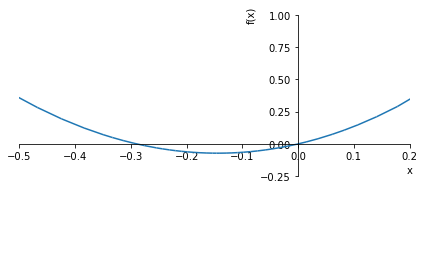

In [22]:
sp.plot(f_4(x),xlim=(-0.5,0.2),ylim=(-1.0,1.0))

Observamos que en $x = 0$

In [15]:
f_4(0)

0

Y por consiguiente, deducimos que tiene una raíz en el intervalo $[0,1]$ es $x=0$. Vamos a aproximarnos a dicha solución con:

### Método de Bisección:

In [42]:
# Calculemos la aproximación de la solución requerida
cifras = 4
v_inic, v_fin = 0,1
biseccion(v_inic, v_fin, f_4, cifras)

MÉTODO DE BISECCIÓN APLICADO A LA ECUACIÓN:  3*x^2 + e^x - 1
Aproximación con 3 decimales: 0.001
Numero de iteraciones requerido:  10


### Método de Newton-Raphson

In [44]:
# Calculemos la aproximación de la solución requerida
v_inic = 0.25
cifras = 6
newton_raphson(v_inic, f_4, df_4, cifras)

MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN:  3*x^2 + e^x - 1
Intervalo con maxima tolerancia. Aproximación solicitada:  0.0006803652632759397
Aproximación con 5 decimales: 0.00068
Numero de iteraciones requerido:  3


# EJERCICIO 5

Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):

i) $f(x)=x^7-x^4+2$ ,

ii) $f(x)=x^7+\cos  x-3$.

### Apartado i

Sea $f : \mathbb{R} \longrightarrow \mathbb{R}$ la aplicación dada por $f(x) = x^{7} - x^{4} + 2$, continua y derivable en todo su dominio.

Vamos a visualizar gráficamente los puntos en los que la función se anula. El teorema Fundamental del Álgebra nos dice que la función posee a lo sumo $7$ raíces, de las que nos interesan sólo las reales.

In [21]:
# Definición de la función y su derivada
def f_5i(x):

    return x**7 - x**4 + 2

def df_5i(x):

    return 7*x**6 - 4*x**3

Intentemos calcular de forma exacta dichas raíces previa visualización gráfica con nuestra función de python:

In [22]:
v5 = sol_exact(f_5i,x,todas=True)

Se han encontrado : 7 soluciones
Solución 1: -1.00000000000000
Solución 2: -0.713102145851293 - 0.98823188827156*I
Solución 3: -0.713102145851293 + 0.98823188827156*I
Solución 4: 1.06110281046036 - 0.376384046559108*I
Solución 5: 1.06110281046036 + 0.376384046559108*I
Solución 6: 0.151999335390936 - 1.01945594669063*I
Solución 7: 0.151999335390936 + 1.01945594669063*I


Observamos que nuestra función ha encontrado $1$ raíz real:

* $x_{1} = -1$

Procederemos entonces a aproximar dicha solución mediante el método de Newton-Raphson, por ejemplo. Elección que viene justificada por la rapidez (cuadrática) de este método frente al de bisección. Pero antes, observemos dicha raíz gráficamente:


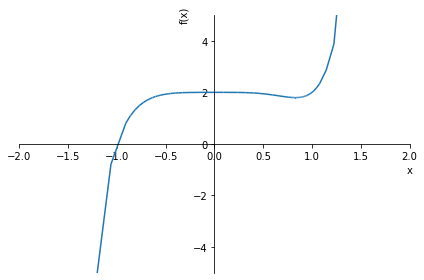

In [23]:
sp.plot(f_5i(x),xlim=(-2.0,2.0),ylim=(-5.0,5.0))

Observamos que:

* $x_{1} = -1 \in [-1.5,-0.5]$

Aproximemos por tanto por el método de Newton-Raphson dicha raíz.

Para ello, tomemos como semilla $x_{0} = -0.8$:

In [24]:
# Calculemos la aproximación de la solución requerida
v_inic = -0.8
cifras = 6
newton_raphson(v_inic, f_5i, df_5i, cifras)

MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN:  x^7 - x^4 + 2
Intervalo con maxima tolerancia. Aproximación solicitada:  -1.0000486417318144
Aproximación con 5 decimales: -1.00005
Numero de iteraciones requerido:  4


### Apartado ii

Sea $f : \mathbb{R} \longrightarrow \mathbb{R}$ la aplicación dada por $f(x) = x^{7} + cos(x) -3$, continua y derivable en todo su dominio.

Vamos a visualizar gráficamente los puntos en los que la función se anula. El teorema Fundamental del Álgebra nos dice que la función posee a lo sumo $7$ raíces, de las que nos interesan sólo las reales.

In [26]:
# Definición de la función y su derivada
def f_5ii(x):

    return x**7 + sp.cos(x) - 3

def df_5ii(x):

    return 7*x**6 - sp.sin(x)

Intentemos calcular de forma exacta dichas raíces previa visualización gráfica con nuestra función de python:

In [28]:
v5ii = sol_exact(f_5ii,x,todas=True)

No existen soluciones para esta ecuación : x^7 + cos(x) - 3


Observamos que nuestra función no ha sido capaz de determinar si la función tiene raíces reales o no. Es por ello que vamos a graficarla para observar como se comporta:

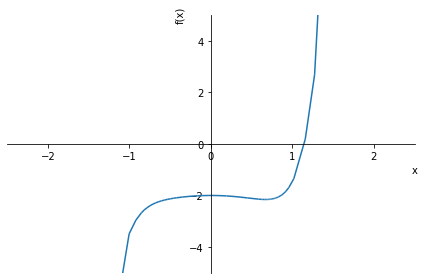

In [32]:
sp.plot(f_5ii(x),xlim=(-2.5,2.5),ylim=(-5.0,5.0))


Claramente se observa que la función tiene una raíz real en el intervalo $[1,2]$. Aproximémosla mediante el método de Newton-Raphson eligiendo como semilla el valor $x_{0} = 1.3$ por ejemplo:

In [34]:
# Calculemos la aproximación de la solución requerida
v_inic = 1.3
cifras = 6
newton_raphson(v_inic, f_5ii, df_5ii, cifras)

MÉTODO DE NEWTON-RAPHSON APLICADO A LA ECUACIÓN:  x^7 + cos(x) - 3
Intervalo con maxima tolerancia. Aproximación solicitada:  1.1454598241657594
Aproximación con 5 decimales: 1.14546
Numero de iteraciones requerido:  4


# EJERCICIO 6

Aplicar los métodos de aceleración de la convergencia de Aitken y Steffensen (según los apuntes) a las sucesiones obtenidas para los distintos métodos programados en esta práctica y comparar los resultados. Para aplicar el método de aceleración de Steffensen, recuerde que para transformar cualquier ecuación de la forma  $ f(x)=0 $  en un problema de puntos fijos  $ g(x)=x $, la forma más simple puede ser definir  $g(x)=x \pm f(x)$.

Hemos modificado los métodos de bisección y Newton-Raphson para que devuelvan en forma de lista los elementos de las sucesiones $\{m_{n}\}_{n \geq 0}$ y $\{x_{n}\}_{n \geq 0}$ que generan dichos métodos respectivamente. Basándonos en dichas sucesiones se van a elaborar dos funciones de aceleración: una para la aceleración de Aitken y otra para la de Steffensen:

In [12]:
# Función de aceleración de la convergencia de Aitken.
def aceleraAitken(xn):

    x_new = []
    for i in range (len(xn)-2):
        x_new.append((xn[i]-(xn[i+1]-xn[i])**2/(xn[i+2]-2*xn[i+1]+xn[i])))

    return x_new

In [35]:
# Función de aceleración de la convergencia de Steffensen.
def aceleraSteffensen(niter,f,x0):

    x_appx = [x0,f(x0),g(g(x0))]
    x_new  = []

    for i in range(niter):
        x0 = x_appx[0]-(x_appx[1]-x_appx[0])**2/(x_appx[2]-2*x_appx[1]+x_appx[0])
        x_appx = [x0,g(x0),g(g(x0))]
        x_new  = x_new + [x_appx[-1]]

    return x_new

A continuación aplicaremos el método de Bisección y el de Newton-Raphson a la función del primer ejercicio:

$f \mathbb{R} \longrightarrow \mathbb{R}$ tal que $f(x) = x^{3} + 4x^{2} -10$

In [16]:
print("La función a la que se le aplica la aceleración es: ", f(x))

#Aplicación g del método de Steffensen
def g(x):

    return x-f(x)

La función a la que se le aplica la aceleración es:  x^3 + 4*x^2 - 10


In [18]:
help(biseccion)

Help on function biseccion in module __main__:

biseccion(a, b, f, cifras=16, nmax=100, prec=1/100000, muestra=True)



Comencemos en primer lugar con el método de **bisección**

In [28]:
# Intervalo en el que vamos a movernos:
a,b=1,2

#Aplicamos método de bisección
bisection = biseccion(a,b,f,False)

In [29]:
# Iteraciones realizadas por el método de Bisección:
print("Iteraciones biseccion: {}".format((bisection)))

Iteraciones biseccion: [1.5, 1.25, 1.375, 1.3125, 1.34375, 1.359375, 1.3671875, 1.36328125, 1.365234375, 1.3642578125, 1.36474609375, 1.364990234375, 1.3651123046875, 1.36517333984375, 1.365203857421875, 1.3652191162109375, 1.3652267456054688, 1.3652305603027344]


In [32]:
#Aceleramos la convergencia con Aitken:
aceleradorAitken = aceleraAitken(bisection)

print("Iteraciones aceleradas. Aitken: {}".format(aceleradorAitken))

Iteraciones aceleradas. Aitken: [1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.375, 1.375, 1.3645833333333333, 1.3645833333333333, 1.3645833333333333, 1.3645833333333333, 1.365234375, 1.365234375, 1.365234375, 1.365234375, 1.365234375, 1.365234375, 1.365234375]


In [33]:
help(aceleraSteffensen)

Help on function aceleraSteffensen in module __main__:

aceleraSteffensen(niter, f, x0)
    # Función de aceleración de la convergencia de Steffensen.



In [36]:
#Ahora vamos con Steffensen
x0 = 1.0
n  = 10
aceleradorSteffensen = aceleraSteffensen(n, g, x0)

print("Iteraciones aceleradas. Steffensen: {}".format(aceleradorSteffensen))

Iteraciones aceleradas. Steffensen: [-241.030092800929, -153.237101980558, -84.8268123412217, -38.1825791158813, -12.1728694032211, -1.45751741717215, 1.16207797407629, 1.36394844922942, 1.36522996151704, 1.36523001341410]


Veamos unaa comparación de los últimos elementos obtenidos con Bisección, Aitken y Steffensen:

In [38]:
print("Último elemento Bisección: ", bisection[len(bisection)-1])
print("\n")
print("Último elemento Aitken: ", aceleradorAitken[len(aceleradorAitken)-1])
print("\n")
print("Último elemento Steffensen: ", aceleradorSteffensen[len(aceleradorSteffensen)-1])


Último elemento Bisección:  1.3652305603027344


Último elemento Aitken:  1.365234375


Último elemento Steffensen:  1.36523001341410


Es el turno ahora de **Newton-Rahpson**:

In [39]:
help(newton_raphson)

Help on function newton_raphson in module __main__:

newton_raphson(b, f, deriv, muestra, cifras=16, nmax=100, prec=1/1000)
    # Método de Newton-Raphson
    # Vamos a encapsular el método de Newton-Raphson en una función



In [41]:
# Necesitamos:
x0 = 1.0
nr = newton_raphson(x0,f,deriv,False)


In [42]:
# Iteraciones del método:
print("Iteraciones Newton-Raphson: {}".format(nr))

Iteraciones Newton-Raphson: [1.0, 1.45454545454545, 1.36890040106952, 1.36523660020212]


In [44]:
#Aceleramos por Aitek:
aceleradorAitkenNR = aceleraAitken(nr)
print("Itraciones aceleradas Aitken: {}".format(aceleradorAitkenNR))

Itraciones aceleradas Aitken: [1.38247908317514, 1.36507286231853]


In [45]:
#Aceleramos por Steffensen:
aceleradorSteffensenNR = aceleraSteffensen(10,g,x0)
print("Iteraciones aceleradas Steffensen: {}".format(aceleradorSteffensenNR))

Iteraciones aceleradas Steffensen: [-241.030092800929, -153.237101980558, -84.8268123412217, -38.1825791158813, -12.1728694032211, -1.45751741717215, 1.16207797407629, 1.36394844922942, 1.36522996151704, 1.36523001341410]


Veamos unaa comparación de los últimos elementos obtenidos con Bisección, Aitken y Steffensen:

In [46]:
print("Último elemento Newton-Raphson: ", nr[len(nr)-1])
print("\n")
print("Último elemento Aitken: ", aceleradorAitkenNR[len(aceleradorAitkenNR)-1])
print("\n")
print("Último elemento Steffensen: ", aceleradorSteffensenNR[len(aceleradorSteffensenNR)-1])

Último elemento Newton-Raphson:  1.36523660020212


Último elemento Aitken:  1.36507286231853


Último elemento Steffensen:  1.36523001341410
